#                                Assignment 2 EE 658 Spring 2024

# Part A: Logistic Regression with Scikit-learn


Load the dataset and split it into training and testing subsets.


In [1]:
import pandas as pd
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv('data.csv')  

# Find the number of rows with any missing values
rows_with_missing_values = df.isnull().any(axis=1).sum()
print("Number of rows with missing values:", rows_with_missing_values)

# Remove rows with any missing values
df_cleaned = df.dropna()

Number of rows with missing values: 0


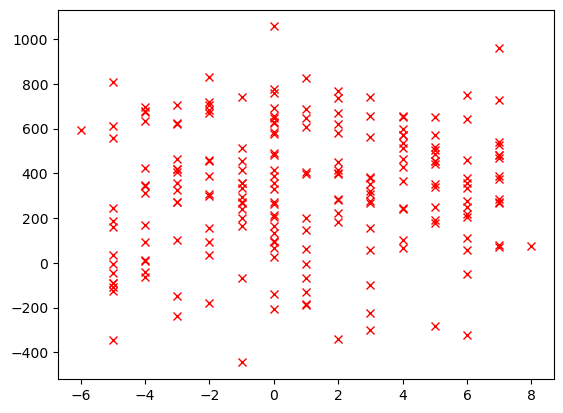

In [2]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X = df[['F1','F2']]
Y=  df['C']

X1=np.array(X)

plt.plot(X1[:, 0],X1[:, 1],'rx')


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)




Use the scikit-learn library to develop a logistic regression model based on the training data. Use only Feature1 and Feature2.

In [4]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model

model = LogisticRegression()

# Train the model on the training data

model.fit(X_train, Y_train)

# Access the coefficients
coefficients = model.coef_
intercept = model.intercept_

print(coefficients)
print(intercept)

[[0.11047145 0.00782536]]
[-2.23703]


Plot the data points and the decision boundary of the model.

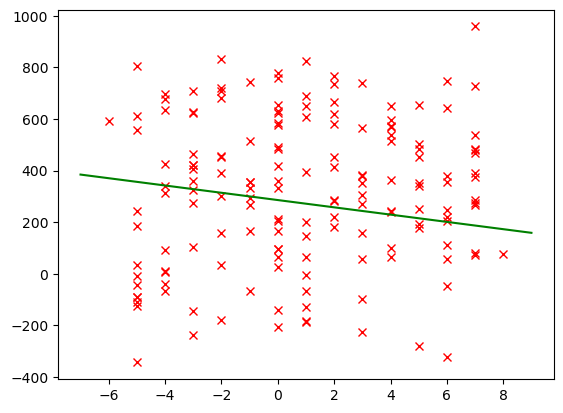

In [5]:


# Access the coefficients
coefficients = model.coef_[0]
intercept = model.intercept_

# Calculate the slope and intercept of the decision boundary line
slope = -coefficients[0] / coefficients[1]
intercept = -intercept / coefficients[1]

# Convert X_train to a NumPy array
X_train_array = np.array(X_train)


# Plot the data points

plt.plot(X_train_array[:, 0],X_train_array[:, 1],'rx')


# Plot the decision boundary line
x_min, x_max = X_train_array[:, 0].min() - 1, X_train_array[:, 0].max() + 1
y_min, y_max = X_train_array[:, 1].min() - 1, X_train_array[:, 1].max() + 1
plt.plot([x_min, x_max], [slope * x_min + intercept, slope * x_max + intercept], color='green')




In [6]:
# Pridict the data 

X_single = np.array([[600, -4]]) 
y_pred_single = model.predict(X_single)


y_pred_single

C:\Users\lunag\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [7]:
# Evaluate the model on the testing data

accuracy = model.score(X_test, Y_test)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.90


# Part B: Logistic Regression Without Scikit-learn



Logistic Regression Without Scikit-learn

In [8]:

# Preprocess the data

X_train1 = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)  # Normalize the features
X_train1 = np.hstack((np.ones((X_train1.shape[0], 1)), X_train1))  # Add a bias term to the feature matrix




# Define the logistic regression model
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    return sigmoid(X @ theta)

# Define the cost function
def cost_function(X, Y, theta):
    m = len(Y)
    h = predict(X, theta)
    return -1 / m * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))


# Define the gradient descent algorithm
def gradient_descent(X, Y, theta, alpha, num_iters):
    m = len(Y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        h = predict(X, theta)
        theta -= alpha / m * X.T @ (h - Y)
        J_history[i] = cost_function(X, Y, theta)
    return theta, J_history

# Initialize the parameter vector theta
theta = np.zeros(X_train1.shape[1])

# Set the learning rate and the number of iterations
alpha = 0.001
num_iters = 25000

# Train the logistic regression model
theta, J_history = gradient_descent(X_train1, Y_train, theta, alpha, num_iters)

print(theta)
print(J_history)
print(X_train1)



[0.32814054 0.36568168 1.92813976]
[0.69302822 0.69290931 0.69279047 ... 0.40302159 0.40302123 0.40302087]
[[ 1.         -0.23540469  1.53257864]
 [ 1.          1.62130834  0.76189564]
 [ 1.         -1.03113884  1.34511521]
 [ 1.         -1.29638356  1.09169242]
 [ 1.          0.29508475  0.45987123]
 [ 1.          1.62130834  0.19256226]
 [ 1.         -1.03113884  1.0673916 ]
 [ 1.         -1.29638356  1.31039976]
 [ 1.          0.82557419  0.87645663]
 [ 1.         -0.23540469  0.88687126]
 [ 1.          0.29508475  1.55687945]
 [ 1.          1.35606362  1.11599323]
 [ 1.         -1.56162828 -0.46703129]
 [ 1.          0.29508475  0.32795252]
 [ 1.          0.29508475  1.20972495]
 [ 1.         -0.23540469  0.33836715]
 [ 1.          0.56032947  0.84868427]
 [ 1.         -0.23540469 -0.77947034]
 [ 1.          1.35606362 -1.27937282]
 [ 1.         -0.23540469 -1.82440539]
 [ 1.          1.0908189   0.46681432]
 [ 1.         -0.23540469  0.03981428]
 [ 1.         -1.03113884  0.133546

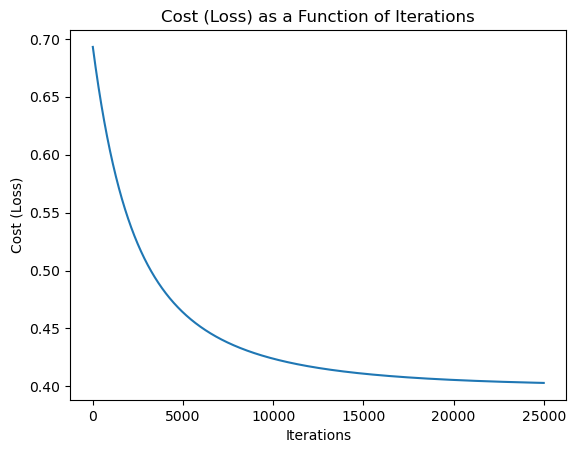

array([[ 1.        , -0.23540469,  1.53257864],
       [ 1.        ,  1.62130834,  0.76189564],
       [ 1.        , -1.03113884,  1.34511521],
       [ 1.        , -1.29638356,  1.09169242],
       [ 1.        ,  0.29508475,  0.45987123],
       [ 1.        ,  1.62130834,  0.19256226],
       [ 1.        , -1.03113884,  1.0673916 ],
       [ 1.        , -1.29638356,  1.31039976],
       [ 1.        ,  0.82557419,  0.87645663],
       [ 1.        , -0.23540469,  0.88687126],
       [ 1.        ,  0.29508475,  1.55687945],
       [ 1.        ,  1.35606362,  1.11599323],
       [ 1.        , -1.56162828, -0.46703129],
       [ 1.        ,  0.29508475,  0.32795252],
       [ 1.        ,  0.29508475,  1.20972495],
       [ 1.        , -0.23540469,  0.33836715],
       [ 1.        ,  0.56032947,  0.84868427],
       [ 1.        , -0.23540469, -0.77947034],
       [ 1.        ,  1.35606362, -1.27937282],
       [ 1.        , -0.23540469, -1.82440539],
       [ 1.        ,  1.0908189 ,  0.466

In [9]:
theta=np.array(theta)
X_train_array1 = np.array(X_train1)
plt.plot(np.arange(num_iters), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (Loss)')
plt.title('Cost (Loss) as a Function of Iterations')
plt.show()
theta
X_train_array1

In [10]:
print(theta)

[0.32814054 0.36568168 1.92813976]


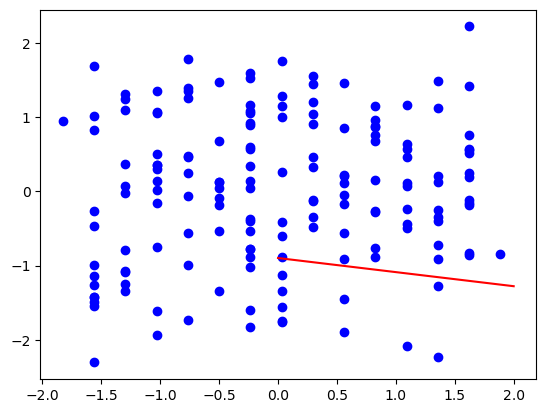

In [11]:

# θ0 is the intercept term (also known as the bias term), and θ1 and θ2 are the weights for the features X1 and X2, respectively.
# Access the coefficients

theta=np.array(theta)

# Calculate the slope and intercept of the decision boundary line
slope1 = -theta[1] / theta[2]
intercept1 = -theta[0] / theta[1]


plt.plot(X_train_array1[:, 1],X_train_array1[:, 2],'bo')



x_min1, x_max1 = X_train_array1[:, 0].min() - 1, X_train_array1[:, 0].max() + 1
y_min1, y_max1 = X_train_array1[:, 1].min() - 1, X_train_array1[:, 1].max() + 1
plt.plot([x_min1, x_max1], [slope1 * x_min1 + intercept1, slope1 * x_max1 + intercept1], color='red')








In [12]:
# Preprocess the test data
X_test1 = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)  # Normalize the features
X_test1 = np.hstack((np.ones((X_test1.shape[0], 1)), X_test1))  # Add a bias term to the feature matrix

# Make predictions on the test data
y_pred = predict(X_test1, theta)

# Threshold the predictions
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(y_pred_binary == Y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9


# Part C: Logistic Regression with Feature Engineering (Scikit-learn)


In [13]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

# Generate polynomial features
X_poly = poly.fit_transform(X)

# Output
print(X_poly)



[[-6.000e+00  5.920e+02 -3.552e+03]
 [-5.000e+00  8.070e+02 -4.035e+03]
 [-5.000e+00 -3.440e+02  1.720e+03]
 [-5.000e+00 -1.260e+02  6.300e+02]
 [-5.000e+00  2.430e+02 -1.215e+03]
 [-5.000e+00  1.850e+02 -9.250e+02]
 [-5.000e+00 -8.900e+01  4.450e+02]
 [-5.000e+00 -7.000e+00  3.500e+01]
 [-5.000e+00 -9.000e+01  4.500e+02]
 [-5.000e+00  1.610e+02 -8.050e+02]
 [-5.000e+00  3.500e+01 -1.750e+02]
 [-5.000e+00  6.110e+02 -3.055e+03]
 [-5.000e+00 -4.500e+01  2.250e+02]
 [-5.000e+00  5.580e+02 -2.790e+03]
 [-5.000e+00 -1.100e+02  5.500e+02]
 [-4.000e+00  1.680e+02 -6.720e+02]
 [-4.000e+00  3.490e+02 -1.396e+03]
 [-4.000e+00  9.100e+01 -3.640e+02]
 [-4.000e+00  6.740e+02 -2.696e+03]
 [-4.000e+00  6.970e+02 -2.788e+03]
 [-4.000e+00  1.200e+01 -4.800e+01]
 [-4.000e+00  4.260e+02 -1.704e+03]
 [-4.000e+00  7.000e+00 -2.800e+01]
 [-4.000e+00 -6.500e+01  2.600e+02]
 [-4.000e+00  6.340e+02 -2.536e+03]
 [-4.000e+00  3.420e+02 -1.368e+03]
 [-4.000e+00 -3.900e+01  1.560e+02]
 [-4.000e+00  3.140e+02 -1.2

In [14]:
import numpy as np

# Assuming X is your NumPy array
dimensions = X_poly.shape

# Print the dimensions
print("Dimensions of X_poly:", dimensions)


Dimensions of X_poly: (200, 3)


In [15]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)


In [16]:
len(X1_test)

40

In [17]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model

model1 = LogisticRegression()

# Train the model on the training data

model1.fit(X1_train, Y1_train)


LogisticRegression()

In [18]:
model1.score(X1_test,Y1_test)

0.9

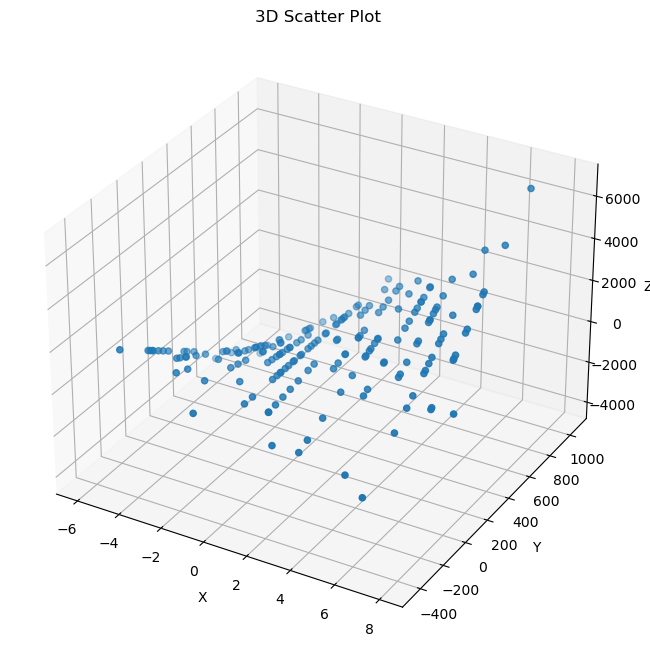

In [19]:
import matplotlib.pyplot as plt
import numpy as np


# Create a 3D scatter plot

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract the x, y, and z coordinates
x = X_poly[:, 0]
y = X_poly[:, 1]
z = X_poly[:, 2]

# Plot the data
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()


In [20]:
# Access the coefficients
coefficients1 = model1.coef_
intercept1 = model1.intercept_

print(coefficients1)
print(intercept1)

[[ 0.16658072  0.00797878 -0.00019321]]
[-2.30199118]


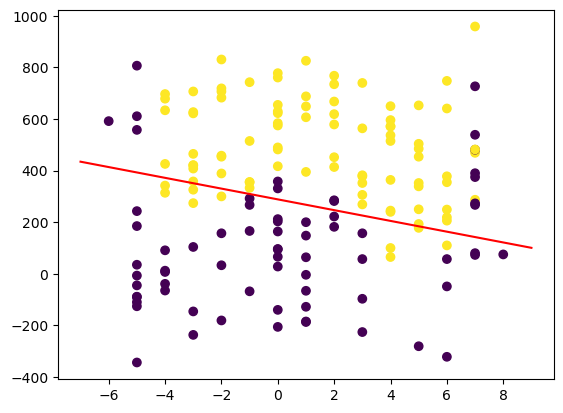

In [21]:
# Access the coefficients
coefficients = model1.coef_[0]
intercept = model1.intercept_

# Calculate the slope and intercept of the decision boundary line
slope = -coefficients[0] / coefficients[1]
intercept = -intercept / coefficients[1]

# Convert X_train to a NumPy array
X_train_array1 = np.array(X1_train)

# Plot the data points
plt.scatter(X_train_array1[:, 0], X_train_array1[:, 1], c=Y1_train, cmap='viridis')

# Plot the decision boundary line
x_min, x_max = X_train_array1[:, 0].min() - 1, X_train_array1[:, 0].max() + 1
y_min, y_max = X_train_array1[:, 1].min() - 1, X_train_array1[:, 1].max() + 1
plt.plot([x_min, x_max], [slope * x_min + intercept, slope * x_max + intercept], color='red')

# Show the plot
plt.show()

# Part D: Logistic Regression with Feature Engineering (Without Scikit-learn)

In [22]:
import numpy as np
import pandas as pd

X_poly
Y=np.array(Y)

# Initialize the weights
w = np.zeros(X_poly.shape[1])

# Set the learning rate and number of iterations
learning_rate = 0.001
num_iterations = 25000

# Train the model using gradient descent
for i in range(num_iterations):
  # Calculate the predictions
  predictions = 1 / (1 + np.exp(-np.dot(X_poly, w)))

  # Calculate the error
  error = Y - predictions

  # Update the weights
  w += learning_rate * np.dot(X_poly.T, error)



C:\Users\lunag\AppData\Local\Temp\ipykernel_12624\3100044380.py:17: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-np.dot(X_poly, w)))


In [23]:
w

array([224.78140462,  93.09372525,  33.11908461])

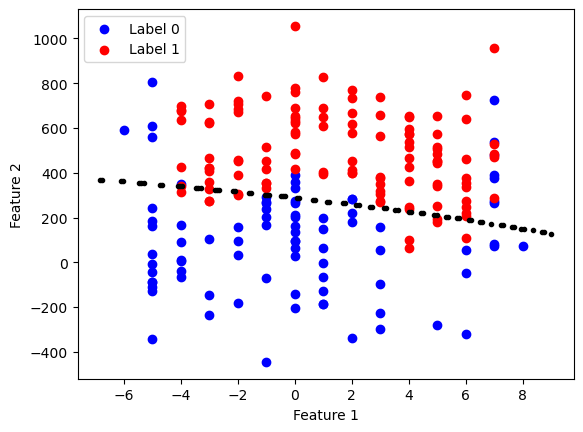

In [27]:
import matplotlib.pyplot as plt
import numpy as np



# Separate the data based on the label
X_0 = X_poly[Y == 0]
X_1 = X_poly[Y == 1]

# Plot the data
plt.scatter(X_0[:, 0], X_0[:, 1], color='blue', label='Label 0')
plt.scatter(X_1[:, 0], X_1[:, 1], color='red', label='Label 1')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()



w = [intercept1[0], *(coefficients1[0])]

x_min1, x_max1 = X_poly[:, 0].min() - 1, X_poly[:, 0].max() + 1
y_min1, y_max1 = X_poly[:, 1].min() - 1, X_poly[:, 1].max() + 1

resolution = 200
xrange = np.linspace(x_min1, x_max1, resolution)
yrange = np.linspace(y_min1, y_max1, resolution)
for i in xrange:
    for j in yrange:
        val = w[0] + w[1]*i + w[2]*j + w[3] * i * j
        if val>-0.01 and val<0.01:
            plt.plot(i, j, 'k.')
plt.show()
